# Comparing Democracies using Python

Julius-Maximilians-Universität Würzburg<br>
Fakultät für Humanwissenschaften<br>
Institut für Politikwissenschaft und Soziologie<br>
Lehrstuhl für Vergleichende Politikwissenschaft und Systemlehre

Prüfungsleistung von

> Severin Simmler<br>
> Matrikel Nr.: 2028090<br>
> `severin.simmler(at)stud-mail.uni-wuerzburg.de`


für das Seminar **Comparing Democracies using R and Python** im Sommersemester 2018 bei Oliver Schlenkrich.

## Inhalt

1. [Einführung](#einfuehrung)<br>
2. [Python als Sprache](#python-als-sprache)<br>
2.1. [Ökosystem](#oekosystem)<br>
2.2. [Architektur eines Python Paktes](#architektur-eines-python-pakets)<br>
2.3. [Paketverwaltung](#paketverwaltung)<br>
2.4. [Virtual Environments](#virtual-environments)<br>
3. [Vorhaben](#vorhaben)<br>
4. [Explorativer Blick auf die Daten](#explorativer-blick-auf-die-daten)<br>
4.1. [Datensatz einlesen](#datensatz-einlesen)<br>
4.2. [Normalisierung](#normalisierung)<br>
4.3. [Dimensionsreduzierung](#dimensionsreduzierung)<br>
4.3.1. [T-Distributed Stochastic Neighbor Embedding](#t-distributed-stochastic-neighbor-embedding)<br>
5. [Klassifikation](#klassifikation)<br>
5.1. [Eine theoretische Annäherung an LSTM Netzwerke](#eine-theoretische-annaeherung-an-lstm-netzwerke)<br>
5.2. [Trainings- und Testdaten](#trainings-und-testdaten)<br>
5.3 [Klassifikator 1: Logistische Regression](#klassifikator-1-logistische-regression)<br>
5.4. [Arbeiten mit unsymmetrischen Datensätzen](#arbeiten-mit-unsymmetrischen-datensaetzen)<br>
5.4.1. [Undersampling mit k-Means](#undersampling-mit-k-means)<br>
5.5. [Klassifikator 2: Künstliches neuronales Netz](#klassifikator-2-künstliches-neuronales-netz)<br>
6. [Performance im Vergleich](#performance-im-vergleich)<br>
6.1.1. [LSTM und logistische Regression](#lstm-und-logistische-regression)<br>
6.1.2. [Beck _et al._ und die hier vorgestellten Klassifikatoren](#beck-et-al-und-die-hier-vorgestellten-klassifikatoren)<br>
7. [Fazit](#fazit)<br>
8. [Anhang](#anhang)<br>
8.1. [Selbstständigkeitserklärung](#selbststaendigkeitserklaerung)

## 1. Einführung <a name="einfuehrung"></a>

Die vorliegende Arbeit stellt einen Versuch dar, internationalen Konflikt quantitativ zu modellieren. Dabei werden sowohl die Datengrundlage, als auch die Vorgehensweise von [Beck _et al._ (2000)](https://dash.harvard.edu/bitstream/handle/1/3992145/King_ImprovingQuantitative.pdf) adaptiert – und _hinterfragt_. Ein optimiertes Forschungsdesign, und die Anwendung jüngster Ansätze aus dem Bereich Deep Learning führen nachweisbar (siehe [6.](#performance-im-vergleich)) zu einem verbesserten, robusteren Modell internationalen Konflikts.

Die Veröffentlichung des Papers von Beck _et al._ (2000) fällt in eine Zeitperiode, die seit den 1980er Jahren andauerte, und als ‚Winter der künstlichen Intelligenz‘ bezeichnet wird (vgl. [Hendler 2008](https://web.archive.org/web/20120212012656/http://csdl2.computer.org/comp/mags/ex/2008/02/mex2008020002.pdf)). Im Besonderen ist es ungewöhnlich, dass in einer _politikwissenschaftlichen_ Arbeit aus dieser Zeit (und ganz allgemein) künstliche neuronale Netze als Methode vorgeschlagen werden – zwar mit für den speziellen Anwendungsfall verhältnismäßig guten, aber allgemein eher dürftigen Ergebnissen. Nicht zuletzt sind zahlreiche Durchbrüche in den letzten Jahren im Bereich _Deep Learning_ ([Minar _et al._ 2018](https://arxiv.org/pdf/1807.08169.pdf) gibt einen aktuellen Überblick) Anlass, die Forschungsfrage von Beck _et al._ erneut aufzugreifen.

In diesem [Jupyter Notebook](http://jupyter.org/) werden sämtliche Schritte, vom Einlesen der Daten, bis zur Evaluation des Modells, ausführlich erläutert. Es folgen insgesamt fünf inhaltliche Blöcke. Im ersten Teil wird in aller Kürze die zum Einsatz kommende Programmiersprache Python und einige _best practices_ vorgestellt ([2.](#python-als-sprache)), anschließend auf das geplante Vorhaben näher eingegangen ([3.](#vorhaben)). Der dritte Block bietet einen _explorativen_ Blick auf den von Beck _et al._ (2000) zur Verfügung gestellten Datensatz ([4.](#explorativer-blick-auf-die-daten)). Im nachfolgenden Teil stehen die zwei, im Rahmen dieser Arbeit entstandenen Modelle im Mittelpunkt, mit besonderem Augenmerk auf dem künstlichen neuronalen Netz ([5.](#klassifikation)). Im letzten inhaltlichen Block ([6.](#performance-im-vergleich)) wird schließlich die Performanz der Modelle mit den Ergebnissen von Beck _et al._ (2000) gegenüber gestellt. In einem zusammenfassenden Fazit wird die Arbeit geschlossen ([7.](#fazit)).

## 2. Python als Sprache <a name="python-als-sprache"></a>

Python ist eine universelle, interpretierte, gut lesbare und einfach zu lernende Programmiersprache.

- **Universell** heißt, dass sie in unterschiedlichen Bereichen – von Web, über Datenanalyse, bis GUI Entwicklung – Anwendung findet.
- **Interpretiert** heißt, dass sie, im Gegensatz zu kompilierten Sprachen, in Echtzeit eingelesen, ‚interpretiert‘, und ausgeführt wird.
- **Gut lesbar** heißt, dass die Sprache bewusst darauf ausgelegt ist, Programmcode einfach und schnell verstehen zu können.
- **Einfach zu lernen** heißt, dass Python hervorragend geeignet ist, um mit dem Programmieren zu beginnen.

Die Philosophie von Python ist _buchstäblich_ in der Standardbibliothek verankert, und kann durch den Import des Moduls `this` angezeigt werden:

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### 2.1. Ökosystem <a name="oekosystem"></a>

Das Ökosystem und die aktive Community (vor allem auf [Stack Overflow](https://stackoverflow.com/)) ist sicherlich ein maßgeblicher Faktor des Erfolgs und der Attraktivität von Python. Die Sprache ist besonders im Bereich Machine Learning beliebt, und verfügt über ein entsprechendes Angebot an Programmbibliotheken. In dieser Arbeit kommen einige der größten und meistgenutzten Pakete zum Einsatz:

- [**`numpy`**](http://www.numpy.org/): Paket für wissenschaftliches Rechnen.
- [**`pandas`**](https://pandas.pydata.org/): Bietet Hilfsmittel für Datenverwaltung und deskriptive Analyse. Baut auf `numpy` auf.
- [**`matplotlib`**](https://matplotlib.org/): Der Quasistandard für Visualisierungen mit Python. Auch in `pandas` enthalten.
- [**`scikit-learn`**](http://scikit-learn.org/): Ein mittlerweile sehr umfangreiches Paket für Machine Learning, das, neben den Algorithmen selbst, auch Module für Preprocessing und Evaluation bietet. Erwartet in der Regel eine Datenstruktur von `numpy` oder `pandas` als Eingabeparameter.
- [**`keras`**](https://keras.io/): Eine _high-level_ Bibliothek, die im Rahmen dieser Arbeit als Schnittstelle zu [TensorFlow](https://www.tensorflow.org/) verwendet wird. TensorFlow wurde erst 2015 veröffentlicht, hat sich aber mehr oder weniger, neben wenigen anderen Bibliotheken, zum _state of the art_ im Bereich Deep Learning und künstliche neuronale Netze etabliert. Nimmt ebenfalls Datenstrukturen von `numpy` oder `pandas` als Eingabe, und wird oft in Kombination mit `scikit-learn` verwendet.

### 2.2. Architektur eines Python Pakets <a name="architektur-eines-python-pakets"></a>

Ein Python Paket (der Begriff „Bibliothek“ wird synonym benutzt) besteht aus einem oder _mehreren_ Modulen. In einem Modul sind ähnliche Funktionen oder Klassen zusammengefasst. Das Paket `beispiel` besteht aus insgesamt zwei Modulen, `core` und `helpers`:

```
beispiel/__init__.py
beispiel/core.py
beispiel/helpers.py
```

Die Datei `__init__.py` macht dieses Verzeichnis überhaupt erst zu einem Paket – ohne diese Datei können Module und Funktionen nicht importiert werden, da sie nicht als solche erkannt werden. Die `__init__.py` Datei sollte entweder leer sein, Dokumentation enthalten, bestimmte Konfigurationen des Pakets definieren, und/oder selbst die Module importieren:

```python
"""
Das ist ein Beispielpaket und verfügt über zwei Module.
"""

from . import core
from . import helpers
```

Der Text zwischen den Anführungszeichen wird nicht als Programmcode interpretiert und dient der Dokumentation. Die zwei unteren Zeilen importieren die beiden Module _absolut_. Ein relativer Import (ohne '`from .`') würde in einem `ModuleNotFound` Fehler resultieren.

Der Import in der `__init__.py` Datei ermöglicht einen Import, ohne den direkten Pfad anzugeben:

```python
>>> from beispiel import funktion
```

Andernfalls müsste `funktion` explizit aus dem entsprechenden Modul importiert werden:

```python
>>> from beispiel.core import funktion
```

Beim Importieren von Paketen und Modulen ist Folgendes zu beachten (vgl. [Reitz, Schlusser 2016](https://docs.python-guide.org/writing/structure/#modules)):

**Sehr schlecht:**
```python
>>> from beispiel import *
>>> x = funktion(1)  # Ist `funktion` Teil von `beispiel`? Ein builtin? Oben definiert?
```

**Gut:**
```python
>>> from beispiel import funktion
>>> x = funktion(1)  # `funktion` könnte Teil von `beispiel` sein, wenn nicht zwischenzeitlich überschrieben
```

**Sehr gut:**
```python
>>> import beispiel
>>> x = beispiel.funktion(1)  # `funktion` ist sichtbar Teil von `beispiel`
```

### 2.3. Paketverwaltung <a name="paketverwaltung"></a>

Für die Verwaltung von Python Paketen empfiehlt sich das Tool [`pip`](http://pip.pypa.io/), das über die Kommandozeile bedient wird, und _third-party libraries_ installiert, die im [Python Package Index](https://pypi.org/) (PyPI) zentral gespeichert sind. Die auf PyPI gehostete Software ist Open Source und für jeden kostenlos zugänglich. Jeder, der über einen ebenfalls kostenfreien Account verfügt, kann eigene Pakete auf PyPI veröffentlichen.

Die Installation des Pakets `numpy` wird beispielsweise folgendermaßen ausgeführt:

```
$ pip install numpy
```

Danach kann `numpy`, wie bereits beschrieben, in Python importiert werden.

### 2.4. Virtual Environments <a name="virtual-environments"></a>

In Python kommen meist Pakete zum Einsatz, die nicht Teil der Standardbibliothek sind, von Dritten entwickelt werden, und manuell nachinstalliert werden müssen. Es kommt durchaus vor, dass sich bestimmte Funktionalitäten oder Ausdrücke von _third-party libraries_ in einer neuen Version ändern. Deswegen benötigen einige Anwendungen bestimmte Versionen von externen Programmbibliotheken. So wird es problematisch mit einer einzigen, systemweiten Python Installation mehrere Anwendungen gleichzeitig lauffähig zu halten. Hier kommen sogenannte _virtual environments_ zum Einsatz; das heißt, für eine spezifische Anwendung wird eine separate, saubere Python Umgebung angelegt, die neben dem systemweiten Python existiert, und in die ausschließlich für die Anwendung erforderliche Pakete in einer speziellen Version installiert werden. Andere _environments_ werden davon nicht beeinflusst.

[`Pipenv`](https://pipenv.readthedocs.io/en/latest/) ist ein benutzerfreundliches Tool, mit dem _virtual environments_ erstellt und verwaltet werden können. Dieses kann mit `pip` folgendermaßen über die Kommandozeile installiert werden:

```
$ pip install pipenv
```

und nach der erfolgreichen Installation ebenfalls über die Kommandozeile gestartet:

```
$ pipenv --help
Usage: pipenv [OPTIONS] COMMAND [ARGS]...

Commands:
  check      Checks for security vulnerabilities and against PEP 508 markers
             provided in Pipfile.
  clean      Uninstalls all packages not specified in Pipfile.lock.
  graph      Displays currently–installed dependency graph information.
  install    Installs provided packages and adds them to Pipfile, or (if none
             is given), installs all packages.
  lock       Generates Pipfile.lock.
  open       View a given module in your editor.
  run        Spawns a command installed into the virtualenv.
  shell      Spawns a shell within the virtualenv.
  sync       Installs all packages specified in Pipfile.lock.
  uninstall  Un-installs a provided package and removes it from Pipfile.
  update     Runs lock, then sync.
```

Erscheint eine Fehlermeldung, dass `pipenv` nicht gefunden wird, kann es alternativ gestartet werden:

```
$ python -m pipenv --help
```

Ein sogenanntes `Pipfile` ist folgendermaßen aufgebaut:

```
[[source]]
url = "https://pypi.org/simple"
verify_ssl = true
name = "pypi"

[packages]
pandas = "==0.23.4"

[requires]
python_version = "3.6"
```

Hier werden die Abhängigkeiten für das _virtual environment_ definiert, zum Beispiel die spezielle Version 0.23.4 für `pandas`. Befindet man sich mit der Kommandozeile im Verzeichnis des `Pipfiles` und führt das Kommando `pipenv install` aus, wird das _virtual environment_ angelegt, und die im `Pipfile` festgeschriebenen Pakete installiert. Das _environment_ selbst wird mit dem Befehl `pipenv shell` aktiviert. Mit `exit` kann die Sitzung wieder beendet werden.

## 3. Vorhaben <a name="vorhaben"></a>

Beck _et al._ (2000) beschäftigen sich in ihrer Arbeit _Improving Quantitative Studies of International Conflict: A Conjecture_ mit dem bekannten, aber selten diskutierten Problem der quantitativen Untersuchung internationaler Konflikte, und weisen auf unzufriedenstellende Ergebnisse in der politikwissenschaftlichn Forschung hin. Die Ursachen von Konflikt, so die Autoren, seien „theorized to be important but often found to be small or ephemeral, [...] indeed tiny for the vast majority of dyads, but [...] large, stable, and replicable wherever the _ex ante_ probability of conflict is large“ (21).

Im weiteren Verlauf wird ein aus mehreren Quellen zusammengetragener Datensatz vorgestellt (in [4.1.](#datensatz-einlesen) _en détail_ betrachtet), der insgesamt 23.529 Dyaden durch neun Variablen beschreibt. Dieser wird von Beck _et al._ verwendet, um ein klassisches logistisches Modell, und ein künstliches neuronales Netz zur binären Klassifikation (‚Konflikt‘ oder ‚kein Konflikt‘) von Dyaden zu erstellen. Bei letzterem Modell handelt es sich um „a type of discrete choice model that differs from the logit only in the shape of the curve“ (25).

Anhand derselben Daten wird im Rahmen dieser Arbeit zunächst eine logistische Regressionsanalyse, einem ‚Klassiker‘ sowohl in den Sozialwissenschaten, als auch im Machine Learning, durchgeführt, und anschließend ein sogenanntes _Long Short-Term Memory artificial neural network_ ([Hochreiter _et al._ 1997](https://www.researchgate.net/publication/13853244_Long_Short-term_Memory))
trainiert, das in den letzten Jahren zunehmend popularisiert wurde und zahlreiche bahnbrechende Erfolge feierte (einen guten Überblick gibt [Lipton _et al._ 2015](https://arxiv.org/pdf/1506.00019.pdf)).

> Ziel dieser Arbeit ist es, _Struktur_ in den Daten internationaler Konflikte nachzuweisen – und das idealerweise **noch** deutlicher als bereits Beck _et al._.

## 4. Explorativer Blick auf die Daten <a name="explorativer-blick-auf-die-daten"></a>

Im folgenden Abschnitt wird der von Beck _et al._ (2000) zur Verfügung gestellte Datensatz zunächst _explorativ_ analysiert. Das schließt Vorverarbeitungsschritte, die für die anschließende Analyse ebenfalls relevant sind, wie das Einlesen und die Normalisierung des Datensatzes mit ein.

### 4.1. Datensatz einlesen <a name="datensatz-einlesen"></a>

Der Datensatz liegt in einer tab-separierten Datei vor, und ist im Verzeichnis `data` relativ zu diesem Jupyter Notebook gespeichert. Um diese Datei in die Python Umgebung einzulesen, muss zunächst der Pfad definiert werden:

In [2]:
import pathlib

path = pathlib.Path("data", "BeckKingZeng.tab")

Das Modul [`pathlib`](https://docs.python.org/3/library/pathlib.html) ist seit Python 3.4 in der Standardbibliothek enthalten und bietet Klassen an, die Dateisystempfade mit einer für verschiedene Betriebssysteme geeigneten Semantik darstellen. Oft führen Windows-spezifische Pfadangaben (mit Backslash, `C:\Users\severin\data`) als reiner String auf UNIX-basierten Betriebssystemen zu Komplikationen (und natürlich auch umgekehrt). Deswegen ist es prinzipiell empfehlenswert auf ein Modul wie `pathlib` zurückzugreifen, um die Reproduzierbarkeit des Codes auf verschiedenen Plattformen möglichst unkompliziert zu halten.

Die Klasse `Path` nimmt einzelne Komponenten des Pfades als Eingabe (aber auch einen einzigen String wie zum Beispiel `"C:\Users\severin\data"`, dessen Einzelteile automatisch erkannt werden), und gibt ein `PosixPath` Objekt (oder bei Windows entsprechend `WindowsPath`) zurück:

```python
>>> pathlib.Path("data", "BeckKingZeng.tab")
PosixPath('data/BeckKingZeng.tab')
```

Attribute des Objekts zerlegen den Pfad in einzelne Teile:
```python
>>> path.stem
'BeckKingZeng'
>>> path.suffix
'.tab'
```

Jedes `Path` Objekt hat u. a. beispielsweise auch eine `open()` Methode, mit dem die Datei geöffnet und gelesen werden kann:
```python
>>> with path.open("r", encoding="utf-8") as file:
...    data = file.read()
```

Der in der Variable `path` gespeicherte `PosixPath` wird jetzt der Funktion `read_table()` aus dem Paket `pandas` (das in der Regel als `pd` importiert wird) übergeben. Diese öffnet die Datei und gibt die Daten in einem `DataFrame` zurück. Mit der Methode `head(n)` werden die ersten `n` Zeilen zurückgegeben.

> **Hinweis**: Die Funktionen einer _Klasse_ (objektorientiertes Programmierparadigma) werden per Konvention als ‚Methoden‘ bezeichnet. Sowohl `pathlib.Path.open()`, als auch `pd.DataFrame.head()` ist eine _Methode_, wohingegen z. B. `pd.read_table()` eine _Funktion_ ist.

In [3]:
import pandas as pd

data = pd.read_table(path)
data.head(5)

,year,aysm,contig,ally,sq,dema,demb,disp,py
0,1947,0.962477,0,0,-0.087511,10,4,0,1
1,1947,0.432808,1,0,0.591468,4,-9,0,1
2,1947,0.984976,0,0,-0.003054,-9,10,0,1
3,1947,0.896463,0,0,0.583652,10,10,0,1
4,1947,0.902849,1,1,0.246667,10,10,0,1


Beck _et al._ (2000) verwenden in ihrer Arbeit das sogenannte _dyad-year design_, und berücksichtigen dabei „pairs of essentially contiguous states or with at least one major power“ (28). Der Datensatz umfasst insgesamt 23.529 _dyad-years_ von 1947 bis 1989, die, neben der Jahrangabe, durch folgende acht Variablen beschrieben werden (ebd.):

- **ally**: Is allied in defense pacts, neutrality pacts, or ententes.
- **asym**: Imbalance of power within the dyad (vgl. [Ray _et al._ 1973](http://journals.sagepub.com/doi/10.1177/004912417300100401)).
- **contig**: Whether the dyad contains geographically contiguous countries.
- **dema** und **demb**: Degree of democratization of the dyad.
- **disp**: Militarized interstate dispute, or not.
- **py**: Number of years since the last conflict.
- **sq**: Similarity of state preferences between two partners.

„We divided the data into an in-sample training set, 1947-85, which we use to fit the model, and a test/validation set, 1986-89, which was used only once to evaluate the forecasts“ (Beck _et al._ 2000, 28). Aus diesem Grund werden die Daten ab 1986 zunächst verworfen. Wie genau die Modelle evaluiert werden, wird im späteren Verlauf geklärt.

In [4]:
data = data[data["year"] < 1986]

Für die geplante Analyse wird auch die Spalte `year` verworfen (irrelevant, da der Klassifikator unabhängig von einer Jahreszahl Vorhersagen machen soll), und jene Werte, die einen _militarized interstate dispute_ (MID) angeben oder nicht, separat behandelt. Die verbleibenden sieben Features werden als `X` gespeichert:

In [5]:
X = data.loc[:, ["aysm", "contig", "ally", "sq", "dema", "demb", "py"]]
X.head(5)

,aysm,contig,ally,sq,dema,demb,py
0,0.962477,0,0,-0.087511,10,4,1
1,0.432808,1,0,0.591468,4,-9,1
2,0.984976,0,0,-0.003054,-9,10,1
3,0.896463,0,0,0.583652,10,10,1
4,0.902849,1,1,0.246667,10,10,1


Was macht `.loc` mit dem `DataFrame`? In Python kann mit der builtin Funktion `help()` auf die Dokumentation eines Pakets, Moduls, Funktion bzw. Methode, oder Klasse zugegriffen werden:

```python
>>> help(data.loc)
```
```
Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
```

Mit `.loc` kann also, basierend auf Labels (Spalten- oder Indexnamen), indiziert werden. Dafür wird in einer eckigen Klammer zuerst auf den Zeilenindex, und nach dem Komma auf den Spaltenindex zugegriffen. Der Doppelpunkt bedeutet, dass _alles_ indiziert wird, mit der Liste wird eine Auswahl getroffen.

Auf einzelne Spalten kann direkt mit dem entsprechenden Label in einer eckigen Klammer zugegriffen werden:

In [6]:
Y = data["disp"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: disp, dtype: int64

> **Exkurs: Zwei grundlegende Datenstrukturen von `pandas`**
>
> Bei `pandas` gibt es `DataFrames` und `Series`, wobei Ersteres 2-dimensional, Letzteres 1-dimensional ist. Die Datenstruktur einer Spalte eines `DataFrames` ist eine `Series`. Wird also wie oben eine einzelne Spalte ausgewählt, erhält man eine `Series`:
```python
>>> type(X)
pandas.core.frame.DataFrame
>>> type(Y)
pandas.core.series.Series
```


Die Bibliothek `pandas` baut auf NumPy auf, einem Python Paket für wissenschaftliches Rechnen, das sehr effizient und in großen Teilen in der Programmiersprache C implementiert ist. NumPy verfügt selbst über eine eigene Datenstruktur, sogenannte ‚ndarrays‘, auf die über das  Attribut `values` einer `Series` oder eines `DataFrames` zugegriffen werden kann:

In [7]:
X = X.values
Y = Y.values

print(f"'X' hat jetzt den Datentyp {type(X)}, genau wie 'Y': {type(Y)}.")

'X' hat jetzt den Datentyp <class 'numpy.ndarray'>, genau wie 'Y': <class 'numpy.ndarray'>.


> **Exkurs: Strings formatieren**
>
> Ab Python 3.6 gibt es sogenannte ‚f-strings‘. Wird ein kleines `f` vor den Anführungszeichen geschrieben, wird der Inhalt in geschweiften Klammern als Programmcode interpretiert und ausgeführt. Alternativ kann die `format()` Methode eines Strings verwendet werden:
```python
>>> f"1 + 1 = {1 + 1}"
'1 + 1 = 2'
>>> "1 + 1 = {ergebnis}".format(ergebnis=1 + 1)
'1 + 1 = 2'
```

Das Attribut `shape` enthält Informationen bezüglich Dimensionalität eines _ndarrays_ (das schließt auch `Series` und `DataFrames` mit ein):

In [8]:
print("'X':", X.shape)
print("'Y':", Y.shape)

'X': (21047, 7)
'Y': (21047,)


### 4.2. Normalisierung <a name="normalisierung"></a>

Die Standardabweichung (siehe unten, berechnet mit der Methode `std()` des ndarrays) ist mit 7,9 sehr hoch und rührt daher, dass die einzelnen Features verschiedene Skalen verwenden und entsprechend variierende numerische Grenzen haben. Ohne Normalisierung würden Features mit mehr oder weniger zufällig hohen Zahlenwerten _ungewollt_ großen Einfluss auf die Vorhersage des Klassifikators nehmen. Mithilfe des `MinMaxScaler` aus dem Paket `scikit-learn` wird der Datensatz normalisiert. Der kleinste Wert im Datensatz wird als 0, der größte Wert als 1 kodiert. Alle Zahlen dazwischen nehmen einen entsprechenden Wert zwischen 0 und 1 an.

In [9]:
X.std()

7.435453244764369

In [10]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

Die Standardabweichung des normalisierten Datensatzes beträgt jetzt nur noch etwa 0,4:

In [11]:
X.std()

0.4089751710925768

### 4.3. Dimensionsreduzierung <a name="dimensionsreduzierung"></a>

Der Datensatz `X` ist 7-dimensional (weil eine Instanz durch 7 Variablen bzw. Features dargstellt wird), und kann in dieser From nicht (oder schwierig) visualisiert werden. Nachfolgend kommt ein Verfahren zum Einsatz, das die Datenpunkte in einem 2-dimensionalen Raum einbettet, der schließlich in einem 2-dimensionalen Scatterplot dargestellt werden kann.

> Dieser Schritt hat mit dem anschließenden Machine Learning _per se_ nichts zu tun, sondern ist lediglich für die Visualisierung des Datensatzes erforderlich.

### 4.3.1. T-Distributed Stochastic Neighbor Embedding <a name="t-distributed-stochastic-neighbor-embedding"></a>

Der von [Maaten _et al._ (2008)](http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) vorgeschlagene Algorithmus _T-distributed Stochastic Neighbor Embedding_ (t-SNE) eignet sich für die Einbettung und Visualisierung hochdimensionaler Objekte in einem zwei- oder dreidimensionalen Raum.

Der Algorithmus besteht aus zwei grundlegenden Schritten (ebd., 2587):
1. Es wird eine Wahrscheinlichkeitsverteilung über Paare der hochdimensionalen Datenpunkte berechnet, dass _ähnliche_ Datenpunkte eher zusammen ausgewählt werden, als _unähnliche_.
2. Eine zweite Wahrscheinlichkeitsverteilung wird über die Datenpunkte im tiefdimensionalen Raum berechnet, welche die Kullback-Leibler-Divergenz ([Kullback, Leibler 1951](https://projecteuclid.org/euclid.aoms/1177729694)) zwischen den zwei Verteilungen minimiert.

Der Algorithmus ist im Modul `manifold` von `scikit-learn` implementiert:

In [12]:
from sklearn import manifold

tsne = manifold.TSNE(random_state=42)
embedding = tsne.fit_transform(X)

Nachfolgend wird eine Funktion (mit dem Schlüsselwort `def`)  definiert, die das Ergebnis der Dimensionsreduzierung (`embedding`), sowie das Array mit den Klassenlabels als Argument nimmt. Da der Befehl `%matplotlib inline` in der folgenden Zelle ausgeführt wird, wird die Grafik automatisch im Jupyter Notebook angezeigt.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_tsne(embedding, Y):
    fig, ax = plt.subplots()
    ax.scatter(embedding[np.where(Y == 0), 0],
               embedding[np.where(Y == 0), 1],
               marker="x",
               color="#729FCF",
               linewidth="1",
               alpha=0.8,
               label="No MID")
    ax.scatter(embedding[np.where(Y == 1), 0],
               embedding[np.where(Y == 1), 1],
               marker="v",
               color="#EF2929",
               linewidth="1",
               alpha=0.8,
               label="MID")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.legend(loc="best")
    return ax

In der Grafik werden zwar Gruppen gebildet, homogene Cluster aus den zwei Klassen sind aber nicht zu erkennen:

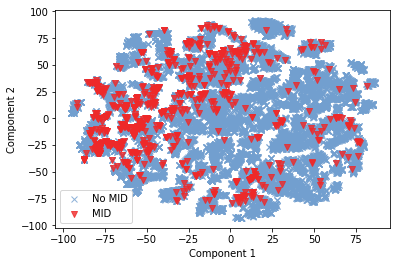

In [14]:
ax = plot_tsne(embedding, Y)

## 5. Klassifikation <a name="klassifikation"></a>

In diesem Teil der Arbeit wird dokumentiert, wie zwei Klassifikatoren mit den Daten von Beck _et al._ (2000) trainiert werden, um _dyad-years_ als MID oder nicht-MID zu klassifizieren. Hier soll in erster Linie aufgezeigt werden, welche Verbesserungen den jüngsten Entwicklungen im Bereich Deep Learning, im Vergleich zu klassischen maschinellen Lernalgorithmen, zu verdanken sind. Dafür wird bewusst auf eine _k-fold cross validation_ bei der Evaluation verzichtet, und zwei Modelle, ein neuronales Netz und eine logistische Regression, mit identischen Trainings- und Testdaten erstellt bzw. evaluiert, um aufzuzeigen, inwiefern die Qualität der Vorhersage durch Deep Learning gesteigert werden kann.

### 5.1. Eine theoretische Annäherung an LSTM Netzwerke <a name="eine-theoretische-annaeherung-an-lstm-netzwerke"></a>

Ein künstliches neuronales Netz setzt sich aus einem _input layer_, einem oder mehreren _hidden layer_, und einem _output layer_ zusammen. Ein _layer_ besteht aus Neuronen, das heißt aus separaten Einheiten, die speziell gewichtet sind. Diese Gewichte werden während des Trainings ermittelt und entscheiden schließlich über die Vorhersage des Modells. Die Neuronen eines _layers_ sind mit allen Neuronen des bzw. den nächsten _layer_ verbunden; so fließt Information, das heißt die Eingabedaten, durch das künstliche neuronale Netz. 

Der _input layer_ verfügt über eine festgelegte Zahl an Neuronen, nämlich so viele, wie die Trainingsdaten Dimensionen haben. Ebenso der _output layer_, der, im Fall einer Klassifikation, so viele Neuronen hat, wie es Klassen gibt. Die Zahl der Neuronen der _hidden layer_ ist variabel und sollte im Rahmen der Hyperparameteroptimierung ermitelt werden; je mehr, desto mächtiger wird das Modell, aber desto rechen- und zeitinesiver wird der Trainingsvorgang (das hier vorgestellte LSTM benötigt, auf insgesamt vier CPUs, etwa 20 Minuten).

In der nachfolgenden Abbildung wird die Architektur des hier vorgestellten Netzwerks dargestellt:

<center>
    <img src="data/img/lstm.png" width="600px">
</center>

Der _input layer_ besteht aus insgesamt sieben (entsprechend den Trainingsdaten), der _output layer_ aus zwei (binäre Klassifikation) Neuronen. Sowohl der LSTM (erster _hidden layer_), als auch der zweite und letzte _hidden layer_ bestehen aus 512 Neuronen, die, wie bereits beschrieben, schichtweise miteinander verbunden sind.

Ein entscheidender Vorteil an einem LSTM, bzw. _recurrent neural networks_ generell, ist die Beständigkeit von Information durch mehrere Schichten; traditionelle künstliche neuronale Netze ‚vergessen‘ ursprüngliche Eingaben über mehrere Zeitschritte hinweg. Das heißt, ein LSTM verarbeitet die Eingabe über _mehrere Zeitschritte_, springt zurück an den Anfang, und korrigiert die Fehler, die sich in einem späteren Zeitschritt herausgestellt haben (vgl. grüner und roter Pfeil in der Grafik).

### 5.2. Trainings- und Testdaten <a name="trainings-und-testdaten"></a>

Um die Performanz des Modells zu evaluieren, wird der Datensatz in Trainings- und Testdaten, hier im Verhältnis 80:20, aufgeteilt. Das Modell wird zunächst mit den Trainingsdaten trainiert, und anschließend mit den (unbekannten) Testdaten evaluiert. Um den Datensatz aufzuteilen, wird eine Funktion aus dem `model_selection` Modul von `scikit-learn` verwendet:

In [15]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    Y,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [16]:
print(f"Traingsdaten: {x_train.shape[0]}, mit {x_train.shape[1]} Features.")
print(f"Testdaten: {x_test.shape[0]}, ebenfalls mit {x_test.shape[1]} Features.")

Traingsdaten: 16837, mit 7 Features.
Testdaten: 4210, ebenfalls mit 7 Features.


### 5.3. Klassifikator 1: Logistische Regression <a name="klassifikator-1-logistische-regression"></a>

Eine logistische Regressionsanalyse dient dazu, ein Modell für die Wahrscheinlichkeit des Eintretens eines bestimmten Ereignisses zu erstellen, das heißt in diesem Fall ein _dyade-year_ wird als MIT oder nicht-MIT klassifiziert. Einfluss auf die Klassifikation haben die sieben, zuvor beschriebenen unabhängigen Variablen.

Dieses Verfahren ist eines der statistischen Standardanalysemodelle in den Sozialwissenschaften, und im Paket `scikit-learn` implementiert:

In [17]:
from sklearn import linear_model

regression = linear_model.LogisticRegression()
regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Die Qualität des Klassifikators ist _prima facie_ sehr hoch, da fast 96% der Testdaten korrekt klassifiziert werden. Dazu wird die Funktion `accuracy_score` verwendet, die den Goldstandard (`y_test`) und die Vorhesage des Modells (`y_pred`) als Eingabe nimmt:

In [18]:
from sklearn import metrics

y_pred = regression.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9584323040380047

Bei näherer Betrachtung der Vorhersage fällt aber auf, dass ausschließlich Klasse 0 (also kein Konflikt) prognostiziert wird:

In [19]:
print("Vorhergesagte Klassen:", np.unique(y_pred))

Vorhergesagte Klassen: [0]


Zum selben Ergebnis sind auch Beck _et al._ (2000, 29) mit ihrem logistischen Modell gekommen. In diesem Fall ist die Accuracy des Modells sehr kritisch zu behandeln. Um eine Instanz stets derselben Klasse zuzuordnen, muss kein maschineller Lernalgorithmus trainiert werden. Der sehr hohe Accuracy Wert ist in diesem Fall irreführend und _falsch_.

Werden die Labels der Testdaten gezählt wird klar, dass Klasse 1 stark unterrepräsentiert ist:

In [20]:
import collections

collections.Counter(y_test)

Counter({0: 4035, 1: 175})

Auch im gesamten Datensatz sind Objekte der Klasse 1 unterrepräsentiert:

In [21]:
def plot_pandas(data, kind, xlabel, ylabel):
    ax = data.plot(kind=kind, color="grey")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

In [22]:
classes = data["disp"].value_counts()
classes

0    20155
1      892
Name: disp, dtype: int64

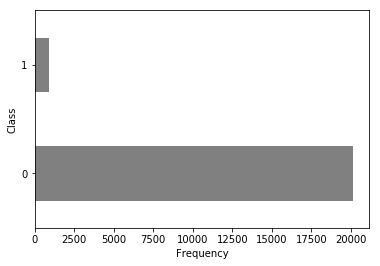

In [23]:
ax = plot_pandas(data=classes,
                 kind="barh",
                 xlabel="Frequency",
                 ylabel="Class")

### 5.4. Arbeiten mit unsymmetrischen Datensätzen <a name="arbeiten-mit-unsymmetrischen-datensaetzen"></a>

Unsymmetrische Trainings- und Testdaten sind nur je nach Anwendung problematisch. Angenommen die Realität _und_ die Daten implizieren, dass in 99,9% aller Fälle `A` eintritt, und `B` nur in 0,01%, wird der Klassifikator vermutlich _immer_ `A` vorhersagen – was korrekt und erstrebenswert ist. In einem Anwendungsfall wie diesem interessieren wir uns aber in erster Linie nicht für eine korrekte Prognose, sondern _warum_ ein Fall eintritt. Die Verzerrung durch die unsymmetrische Verteilung wird also problematisch.

Es gibt zwei gängige Methoden, um den Datensatz zu _entzerren_:

1. **Oversampling**: Objekte aus der _unterrepräsentierten_ Klasse werden dupliziert oder synthetisch generiert (Duplikate werden zum Beispiel minimal geändert).
2. **Undersampling**: Ojekte aus der _überrepräsentierten_ Klasse werden verworfen, dass beide Klassen (ungefähr) symmetrisch verteilt sind.

Da in der unterrepräsentierten Klasse insgesamt 892 Objekte sind, was für das Erstellen eines Klassifikators theoretisch ausreichend ist, und synthetische Objekte prinzipiell problematisch sind (entsprechen nicht zwangsläufig der Realität), wird die überrepräsentierte Klasse _undersampled_.

Dafür werden aus den ürsprünglichen Daten Objekte beider Klassen in separaten Variablen gespeichert:

In [24]:
def get_classes(data):
    data = data.iloc[:, 1:]  # skip first column
    class_0 = data[data["disp"] == 0].drop("disp", axis=1)
    class_1 = data[data["disp"] == 1].drop("disp", axis=1)
    return class_0.values, class_1.values

In [25]:
class_0, class_1 = get_classes(data)

print("Shape für Klasse 0:", class_0.shape)
print("Shape für Klasse 1:", class_1.shape)

Shape für Klasse 0: (20155, 7)
Shape für Klasse 1: (892, 7)


### 5.4.1. Undersampling mit k-Means <a name="undersampling-mit-kmeans"></a>

Um möglichst heterogene Datenpunkte aus der überrepräsentierten Klasse zu behalten, wird diese mit dem sogenannten _k-Means Algorithmus_ in insgesamt 2000 Gruppen (also immer noch mehr als das Doppelte der unterrepräsentierten Klasse) geclustert. Das heißt, ähnliche Objekte befinden sich im selben Cluster. Übernommen werden jetzt ausschließlich die Clusterzentren.

Erneut wird die Implementierung von `scikit-learn` verwendet:

In [26]:
from sklearn.cluster import KMeans

n_clusters = 2000

print(f"Insgesamt {n_clusters} Cluster.")

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(class_0)

Insgesamt 2000 Cluster.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2000, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In der Variable für Klasse 0 werden nun nur die Clusterzentren gespeichert:

In [27]:
class_0 = kmeans.cluster_centers_

Und der neue Datensatz mit entsprechenden Labels wird erstellt:

In [28]:
X = np.append(class_0, class_1, axis=0)
Y = np.array([0 for i in range(n_clusters)] + [1 for i in range(class_1.shape[0])])

Die Daten müssen auch jetzt wieder normalisiert werden:

In [29]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

Der weitaus kleinere Datensatz kann nun erneut in einen 2-dimensionalen Raum eingebettet werden:

In [30]:
tsne = manifold.TSNE(random_state=42)
embedding = tsne.fit_transform(X)

Wieder haben sich Cluster gebildet, die zwar diesmal deutlich homogener sind, aber auch jetzt kein klassenspezifisches Muster erkennen lassen:

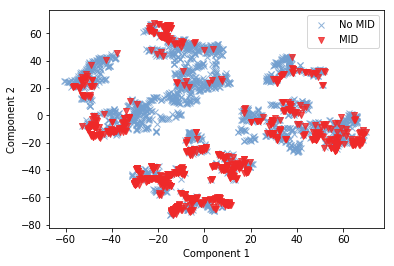

In [31]:
ax = plot_tsne(embedding, Y)

Der Datensatz wird auch in Trainings- und Testdaten im Verhältnis 80:20 aufgeteilt. Es ist durchaus gefährlich, wie bei Beck _et al._ (2000) geschehen, einen Klassifikator mit stark unsymmetrischen Daten zu testen (alle Instanzen ab 1986 – inwiefern unsymmetrisch, ist der Tabelle in [6.1.2.](#beck-et-al-und-die-hier-vorgestellten-klassifikatoren) zu entnehmen), da so unter Umständen Schwächen des Modells, eine oder mehrere Klassen korrekt vorherzusagen, unbemerkt bleiben.

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    Y,
                                                                    test_size=0.2,
                                                                    random_state=42)

In [33]:
print(f"Traingsdaten: {x_train.shape[0]}, mit {x_train.shape[1]} Features.")
print(f"Testdaten: {x_test.shape[0]}, ebenfalls mit {x_test.shape[1]} Features.")

Traingsdaten: 2313, mit 7 Features.
Testdaten: 579, ebenfalls mit 7 Features.


Und wieder wird eine logistische Regressionsanalyse durchgeführt. Diesmal mehrmals mit variierenden Parameter für `C`.

> Je größer `C`, desto komplexer das Modell, desto größer die Gefahr des _overfitting_ (bzw. _underfitting_ bei kleinen Werten).

In [34]:
parameters = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = dict()

for C in parameters:
    # Construct and train model object:
    regression = linear_model.LogisticRegression(C=C)
    regression.fit(x_train, y_train)
    # Classify train and test data:
    y_score_train = regression.predict(x_train)
    y_score_test = regression.predict(x_test)
    # Calculate accuracy:
    accuracy_train = metrics.accuracy_score(y_train, y_score_train)
    accuracy_test = metrics.accuracy_score(y_test, y_score_test)
    # Save accuracies in a dictionary:
    accuracies[str(C)] = {"train": accuracy_train, "test": accuracy_test}

Offenbar liefert der Wert 1 für `C` die besten Ergebnisse:

In [35]:
pd.DataFrame(accuracies)

,0.001,0.01,0.1,1,10,100,1000
test,0.701209,0.718480,0.775475,0.785838,0.782383,0.782383,0.780656
train,0.689148,0.727626,0.782534,0.795936,0.794639,0.795504,0.795504


In [36]:
regression = linear_model.LogisticRegression(C=1)
regression.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_pred = regression.predict(x_test)

Jetzt ist die Accuracy zwar gesunken:

In [38]:
metrics.accuracy_score(y_test, y_pred) 

0.7858376511226253

Diesmal werden aber beide Klassen vorhergesagt:

In [39]:
print("Vorhergesagte Klassen:", np.unique(y_pred))

Vorhergesagte Klassen: [0 1]


In einem realistischen Verhältnis:

In [40]:
collections.Counter(y_pred)

Counter({0: 444, 1: 135})

### 5.5. Klassifikator 2: Künstliches neuronales Netz <a name="klassifikator-2-künstliches-neuronales-netz"></a>

Der zweite Klassifikator, ein künstliches neuronales Netz, wird mithilfe von [`keras`](https://keras.io/), einer *high-level neural networks* API, mit den identischen Daten trainiert und evaluiert. Im Backend wird die von Google entwickelte Bibliothek [TensorFlow](https://www.tensorflow.org/) verwendet.

Der Datensatz muss erneut vorbereitet werden, da ein LSTM die Eingabe, anders als eine klassische logistische Regression, in einem 3-dimensionalen, und die Labels in einem 2-dimensionalen Format erwartet.

Zunächst werden folgende Grundbegriffe eingeführt und erläutert:

- **Activation**: Eine sogenannte Aktivierungsfunktion, von der abhängt, welche Ausgabe ein _hidden node_ produziert.
- **Dropout**: Eine Regularisierungstechnik, die darauf abzielt, die Komplexität des Modells zu reduzieren, um Overfitting vorzubeugen. 
- **Dense**: Ein _layer_, bei der jedes Neuron mit jedem Neuron im nächsten _layer_ verbunden ist.
- **Optimizer**: Optimierungsalgorithmen helfen, die Verlustfunktion, die von den internen lernfähigen Parametern abhängt, zu minimieren.
- **Timesteps**: Die Zahl der Schritte, die das LSTM zurückgehen soll, um Fehler zu korrigieren.
- **Hidden nodes** oder **units**: Die Zahl der Neuronen eines _layers_. Je größer diese Zahl, desto _mächtiger_ wird das neuronale Netz, desto mehr Parameter werden gelernt, desto rechen- und zeitintensiver wird das Training.
- **Layer**: Ein künstliches neuronales Netz besteht aus _Schichten_. Wenn es mehr als zwei Schichten gibt, spricht man von einem _deep neural network_.
- **Input dimension**: Die Dimensionen der Eingabedaten – in diesem Fall 7, weil eine Instanz duch 7 Features dargestellt wird.
- **Batch size**: Definiert die Anzahl der Samples, die auf einmal durch das Netzwerk getrieben werden.
- **Epoch**: _Alle_ Trainingsdaten werden einmal vorwärts, und einmal rückwärts durch das Netzwerk getrieben, normalerweise nicht komplett auf einmal, sondern in _batches_.
- **Learning rate**: Gibt an, wie sehr die Gewichte pro _batch_ aktualisiert werden, und wird im _optimizer_ definiert.

In [41]:
from keras.utils import np_utils

def preprocess_data(x_train, x_test, y_train, y_test, timestep=1):
    x_train = x_train.reshape(x_train.shape[0], timestep, x_train.shape[1])
    x_test = x_test.reshape(x_test.shape[0], timestep, x_test.shape[1])
    y_train = np_utils.to_categorical(y_train, 2)
    y_test = np_utils.to_categorical(y_test, 2)
    return x_train, x_test, y_train, y_test

Using TensorFlow backend.


In der Funktion `preprocess_data()` werden die Daten in die passende Form gebracht:

In [42]:
x_train_lstm, x_test_lstm, y_train_lstm, y_test_lstm = preprocess_data(x_train, x_test, y_train, y_test)

print("Shape Trainingsdaten:", x_train_lstm.shape)
print("Shape Labels:", y_train_lstm.shape)

Shape Trainingsdaten: (2313, 1, 7)
Shape Labels: (2313, 2)


In der Funktion `construct_model()` wird die Architektur des künstlichen neuronalen Netzes festgelegt (vgl. Abbildung in [5.1.](#eine-theoretische-annaeherung-an-lstm-netzwerke)). Das Modell wird kompiliert zurückgegeben und verwendet als Verlustfunktion die mittlere quadratische Abweichung (MSE) und als Evaluationsmaß die Accuracy.

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
from keras.optimizers import Adam

def construct_model(input_shape, output_units):
    model = Sequential()
    model.add(LSTM(units=512, input_shape=input_shape, name="Input"))
    model.add(Activation("relu", name="ActivateInput"))
    model.add(Dropout(rate=0.026079803111884514, name="DropoutInput"))
    model.add(Dense(units=512, name="HiddenLayer"))
    model.add(Activation("linear", name="ActivateHiddenLayer"))
    model.add(Dropout(rate=0.4371162594318422, name="DropoutHiddenLayer"))
    model.add(Dense(units=output_units, name="Output"))
    model.add(Activation("softmax", name="ActivateOutput"))

    optimizer = Adam(lr=0.005)

    model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])
    return model

Alle Komponenten haben bereits bestimmte Parameter eingestellt. Diese sogenannten Hyperparameter wurden Schritt für Schritt mithilfe des Pakets [`hyperas`](https://github.com/maxpumperla/hyperas) optimiert.

Für jeden zu optimierenden Hyperparameter wird eine Reihe von möglichen Werten eingesetzt, `hyperas` trainiert mehrere Modelle, vergleicht das Ergebnis des MSE und der Accuracy, und gibt den Parameter zurück, der zu den besten Ergebnisse geführt hat. Die Syntax für die Optimierung der Aktivierungsfunktion ist beispielsweise folgende:

```python
    model.add(Activation({{choice(["softmax", "linear", "relu", "sigmoid"])}}))
```

`hyperas` interpretiert die Werte in den geschweiften Klammern als Parameterwerte und erstellt entsprechend vier Modelle.

Hier wird nun das Modell definiert mit einem Timestep von 1, einer Eingabedimension von 7, und einer Ausgabedimension von 2:

In [44]:
lstm = construct_model(input_shape=(1, 7),
                       output_units=2)

Mit der Methode `summary()` kann eine Zusammenfassung der Netzarchitektur ausgegeben werden. In dem Modell werden insgesamt 1.328.642 Parameter gelernt:

In [45]:
lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (LSTM)                 (None, 512)               1064960   
_________________________________________________________________
ActivateInput (Activation)   (None, 512)               0         
_________________________________________________________________
DropoutInput (Dropout)       (None, 512)               0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 512)               262656    
_________________________________________________________________
ActivateHiddenLayer (Activat (None, 512)               0         
_________________________________________________________________
DropoutHiddenLayer (Dropout) (None, 512)               0         
_________________________________________________________________
Output (Dense)               (None, 2)                 1026      
__________

Jetzt wird das künstliche neuronale Netz trainiert. Wenn das Argument `verbose` auf 1 gesetzt ist, wird der Zustand der aktuellen Epoch ausgegeben. Die _batch size_ wurde auf 16 festgelegt (dieser Wert wurde im Rahmen der Hyperparameteroptimierung ermittelt). Als Validierungsdaten wird das Testdatenset, wie bei der logistischen Regression, übergeben:

In [46]:
history = lstm.fit(x=x_train_lstm,
                   y=y_train_lstm,
                   epochs=100,
                   batch_size=16,
                   verbose=0,
                   validation_data=(x_test_lstm, y_test_lstm))

Das fertige Modell kann mit der entsprechenden Methode gespeichert:

```python
>>> lstm.save("model.h5")
```

oder wieder geladen werden:

```python
>>> from keras.models import load_model
>>> lstm = load_model("model.h5")
```

Das fertige Modell kann über [diesen Link](https://drive.google.com/file/d/1LlcYt7Pdg-wzmERaHVRJlZqD5zWKxKO0/view?usp=sharing) heruntergeladen werden (~16MB).

Der MSE und die Accuracy für Trainings- und Testdaten wurde nach jeder Epoch gespeichert und können über das Attribut `history` eingesehen werden:

In [47]:
history = pd.DataFrame(history.history)
history.describe()

,val_loss,val_acc,loss,acc
count,100.000000,100.000000,100.000000,100.000000
mean,0.110439,0.843022,0.102828,0.858240
std,0.011639,0.017224,0.012527,0.018136
min,0.092449,0.796200,0.088126,0.774319
25%,0.101386,0.832470,0.094712,0.853329
50%,0.108221,0.844560,0.098826,0.862732
75%,0.116251,0.854922,0.107123,0.870082
max,0.147540,0.877375,0.158943,0.880674


Damit kann gezeigt werden, wie das künstliche neuronale Netz nach jeder Epoch besser wird:

In [48]:
def plot_history(data, measure):
    if measure == "accuracy":
        cols = ["acc", "val_acc"]
        ylabel = "Accuracy"
    elif measure == "loss":
        cols = ["loss", "val_loss"]
        ylabel = "Mean Squared Error"
    data = data.loc[:, cols]
    data.columns = ["Train", "Test"]
    ax = data.plot(style=[":", "-"], color="black")
    ax.set_xlabel("Epoch")
    ax.set_ylabel(ylabel)
    if measure == "accuracy":
        ax.set_yticklabels(["{:,.0%}".format(tick) for tick in ax.get_yticks()])
    return ax

#### Accuracy

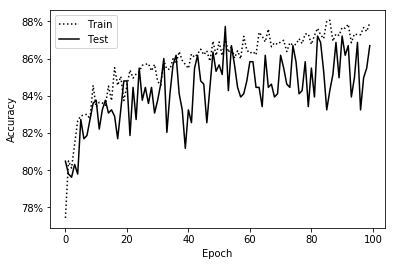

In [49]:
ax = plot_history(history, measure="accuracy")

#### MSE

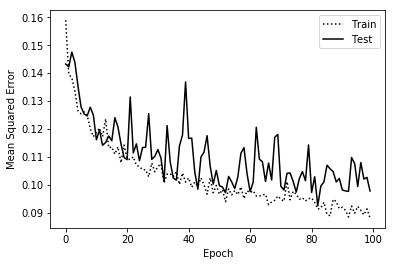

In [50]:
ax = plot_history(history, measure="loss")

### 6. Performance im Vergleich <a name="performance"></a>

In dem letzten inhaltlichen Teil der Arbeit wird zunächst die Performance der zwei trainierten Klassifikatoren gegenüber gestellt, und anschließend mit den Ergebnissen von Beck _et al._ (2000) verglichen.

### 6.1.1. LSTM und logistische Regression <a name="lstm-und-logistische-regression"></a>

Dafür werden zunächst _Wahrscheinlichkeiten_ für die Testdaten vorhergesagt:

In [51]:
y_score_regression = regression.predict_proba(x_test)
y_score_lstm = lstm.predict_proba(x_test_lstm)

Und anschließend eine Funktion definiert, die eine sogenannte ROC Kurve visualisiert und den AUC Wert berechnet.

> **Exkurs: ROC und AUC**
>
> Die Receiver-Operating-Characteristic-Kurve (oder: ROC-Kurve) setzt die True-Positive mit der False-Positive Rate eines Klassifikators in Relation, und beschreibt somit die Performanz bzw. die Qualität der Prognosen. Die Fläche unterhalb der Kurve, die _area under curve_ (AUC), beschreibt die Qualität der Vorhersagen in einer einzigen Zahl, die zwischen 0 und 1 liegt.

In [52]:
def plot_roc_auc(y_scores):
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], "--", color="black")
    for marker, model in zip(["-", ":"], y_scores):
        y_score, y_test = y_scores[model]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
        auc = metrics.auc(fpr, tpr)
        ax.plot(fpr, tpr, color="black", linestyle=marker, label=f"{model} (AUC = {round(auc, 2)})")
    ax.legend(loc="best")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.03])
    return ax

Wie zu erkennen ist, macht das LSTM mit einem AUC Wert von 0,93 bessere Prognosen als die logistische Regression.

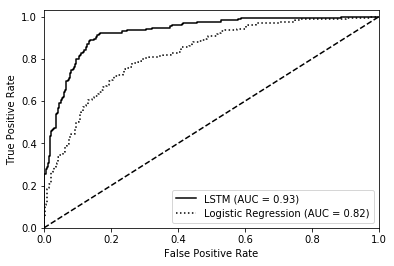

In [53]:
y_scores = {"LSTM": (y_score_lstm[:, 1], y_test),
            "Logistic Regression": (y_score_regression[:, 1], y_test)}
ax = plot_roc_auc(y_scores)

### 6.1.2. Beck _et al._ und die hier vorgestellten Klassifikatoren <a name="beck-et-al-und-die-hier-vorgestellten-klassifikatoren"></a>

Beck _et al._ (2000) bewerten ihre Modelle anhand der Genauigkeit der Prognosen. Dafür teilen sie den gesamten Datensatz nach Klassen auf, und machen für verschiedene Zeitperioden Vorhersagen, die evaluiert werden. Das schließt sowohl deren Trainingsdaten (1947-1985), als auch Testdaten (1986-1989) ein. Das _logit model_ hat eine durchschnittliche Genauigkeit von 50%, das neuronale Netz 62%.

Der untenstehenden Tabelle sind die Werte der hier vorgestellten, neuen Modelle zu entnehmen.

<table>
  <tr>
    <td></td>
    <td><b>Conflict: % Correct</b></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
    <td><b>Peace: % Correct</b></td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td><b>Year</b></td>
    <td><b>Logit (Beck _et al._)</b></td>
    <td><b>NN (Beck _et al._)</b></td>
    <td><b>Logit (Simmler)</b></td>
    <td><b>LSTM (Simmler)</b></td>
    <td><b>Number of 1s</b></td>
    <td><b>Logit (Beck _et al._)</b></td>
    <td><b>NN (Beck _et al._)</b></td>
    <td><b>Logit (Simmler)</b></td>
    <td><b>LSTM (Simmler)</b></td>
    <td><b>Number of 0s</b></td>
  </tr>
  <tr>
    <td><b>1947-85</b></td>
    <td>0</td>
    <td>25,3</td>
    <td>57,85</td>
    <td>70,85</td>
    <td>892</td>
    <td>100</td>
    <td>99,58</td>
    <td>89,61</td>
    <td>80,6</td>
    <td>20.155</td>
  </tr>
  <tr>
    <td><b>1986</b></td>
    <td>0</td>
    <td>18,5</td>
    <td>55,56</td>
    <td>77,78</td>
    <td>27</td>
    <td>100</td>
    <td>99,83</td>
    <td>93,66</td>
    <td>84,08</td>
    <td>584</td>
  </tr>
  <tr>
    <td><b>1987</b></td>
    <td>0</td>
    <td>14,3</td>
    <td>53,57</td>
    <td>71,43</td>
    <td>28</td>
    <td>100</td>
    <td>98,98</td>
    <td>93,19</td>
    <td>85,52</td>
    <td>587</td>
  </tr>
  <tr>
    <td><b>1988</b></td>
    <td>0</td>
    <td>23,1</td>
    <td>84,62</td>
    <td>92,3</td>
    <td>13</td>
    <td>100</td>
    <td>99,34</td>
    <td>91,46</td>
    <td>82,76</td>
    <td>609</td>
  </tr>
  <tr>
    <td><b>1989</b></td>
    <td>0</td>
    <td>12,5</td>
    <td>62,5</td>
    <td>87,5</td>
    <td>16</td>
    <td>100</td>
    <td>99,51</td>
    <td>92,07</td>
    <td>82,85</td>
    <td>618</td>
  </tr>
  <tr>
    <td><b>1986-89</b></td>
    <td>0</td>
    <td>16,7</td>
    <td>57,14</td>
    <td>78,57</td>
    <td>84</td>
    <td>100</td>
    <td>99,42</td>
    <td>92,49</td>
    <td>83,53</td>
    <td>2.398</td>
  </tr>
  <tr>
    <td><b>Total</b></td>
    <td>0</td>
    <td>24,6</td>
    <td>59,02</td>
    <td>72,74</td>
    <td>976</td>
    <td>100</td>
    <td>99,57</td>
    <td>89,19</td>
      <td>80,02</td>
    <td>22.553</td>
  </tr>
</table>

Hier hat die logistische Regression eine durchschnittliche Accuracy von 74%, das LSTM hingegen _nur_ 76%. Beide Modelle sind durch den Ausgleich der unsymmetrischen Trainingsdaten überraschend gut, in jedem Fall deutlich besser als die Ergebnisse von Beck _et al._. Besonders interessant ist, dass die logistische Regression bessere Vorhersagen für Frieden, und das LSTM bessere Vorhersagen für Konflikt macht.

> Ein binärer Klassifikator ist wertvoller, wenn er, wie das LSTM und im Grunde auch die hier vorgestellte logistische Regression, für _beide_ Klassen ungefähr gleichwertige Ergebnisse liefert, statt für eine Klasse (nahe) 100% Accuracy, und für die andere deutlich unter 50%.

### 7. Fazit <a name="fazit"></a>

Ziel dieser Arbeit war es, Struktur in den Daten internationaler Konflikte nachzuweisen. Dafür wurden Daten und Ansatz von Nathaniel Becks, Gary Kings und Langche Zengs Aufsatz _Improving Quantitative Studies of International Conflict: A Conjecture_ aus dem Jahr 2000 adaptiert – und verbessert. Durch den Ausgleich der stark unsymmetrische Datengrundlage mithilfe eines Clustering Algorithmus, konnten sowohl mit einer logistischen Regression, als auch mit einem künstlichen neuronalen Netz, einem LSTM, ein _deutlich_ zuverlässigeres Modell erstellt werden.

Es gibt nun eine ganze Reihe von Möglichkeiten die Experimente fortzusetzen, beispielsweise könnte untersucht werden, ob das LSTM mit mehr Schichten und/oder einer erneuten Hyperparameteroptimierung an Accuracy gewinnt, oder ob ein ganz simples neuronales Netz mit nur einem _hidden layer_ gleiche oder bessere Ergebnisse liefert. Eine weiterer Ansatz wäre, die Daten anders auszuwählen (zufällig statt den Zentren der Cluster), oder doch den gesamten Datensatz zu verwenden, die Instanzen aber beim Training entsprechend zu gewichten.

### 8. Anhang <a name="anhang"></a>
### 8.1. Selbstständigkeitserklärung <a name="selbststaendigkeitserklaerung"></a>

Hiermit versichere ich, Severin Simmler, 2028090, dass ich die vorliegende Arbeit selbstständig verfasst, keine anderen als die angegebenen Quellen und Hilfsmittel benutzt und die Prüfungsleistung bisher oder gleichzeitig keiner anderen Prüfungsbehörde vorgelegt
habe. Alle Stellen, die anderen Werken dem Wortlaut oder dem Sinn nach entnommen sind, habe ich einzeln durch Angaben der Quelle, auch der benutzten Sekundärliteratur, als Entlehnung kenntlich gemacht.